<a href="https://colab.research.google.com/github/AdibaMuskaan/ML/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Dataset.csv")
df.head()

,sno,Name,Age,Income
0,2,Rob,27,70000
1,3,Michael,29,90000
2,4,Mohan,29,61000
3,5,Ismail,28,60000
4,6,Kory,42,150000


Text(0, 0.5, 'Income')

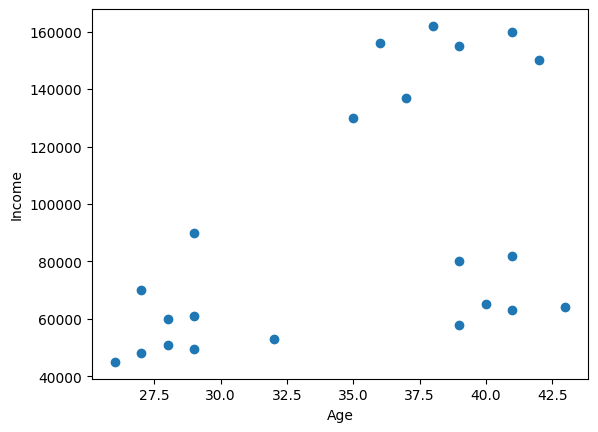

In [4]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [7]:
df['cluster']=y_predicted
df.head()

,sno,Name,Age,Income,cluster
0,2,Rob,27,70000,1
1,3,Michael,29,90000,1
2,4,Mohan,29,61000,2
3,5,Ismail,28,60000,2
4,6,Kory,42,150000,0


In [8]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

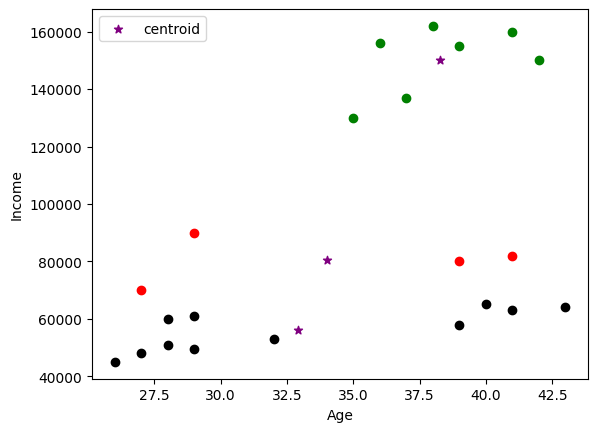

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [11]:
df['cluster']=y_predicted
df.head()

,sno,Name,Age,Income,cluster
0,2,Rob,27,70000,0
1,3,Michael,29,90000,0
2,4,Mohan,29,61000,2
3,5,Ismail,28,60000,2
4,6,Kory,42,150000,1


In [12]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

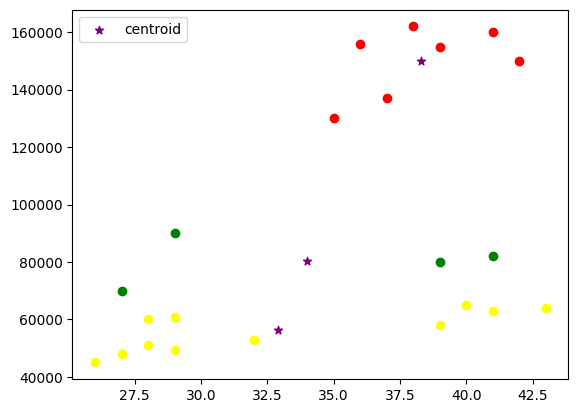

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [14]:
sse = [] #see-->
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

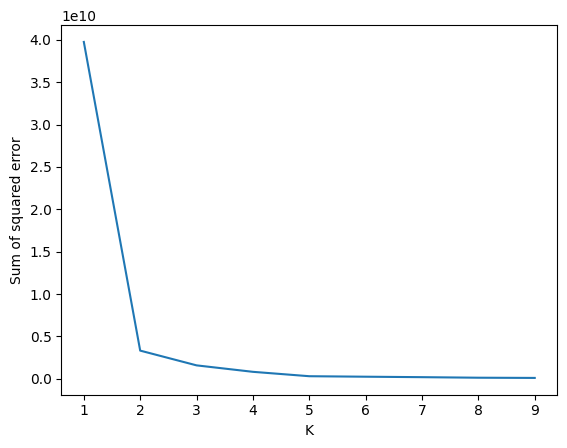

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


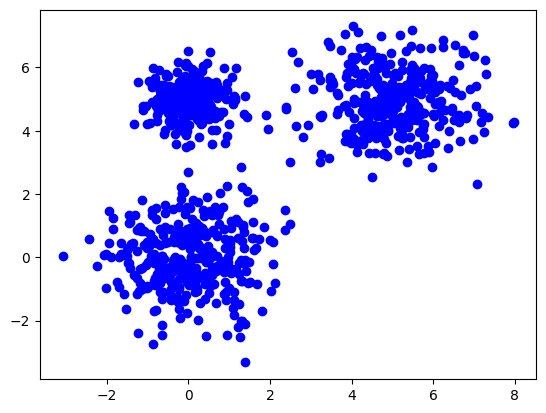

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generation of nested dummy data
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.5, 1.0])

plt.scatter(X[:,0], X[:,1], color='blue')
plt.show()

In [17]:
from sklearn.cluster import DBSCAN

# model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# the number of clusters found by DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")
# Number of clusters found by DBSCAN: 3

Number of clusters found by DBSCAN: 4


In [18]:
import numpy as np

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)

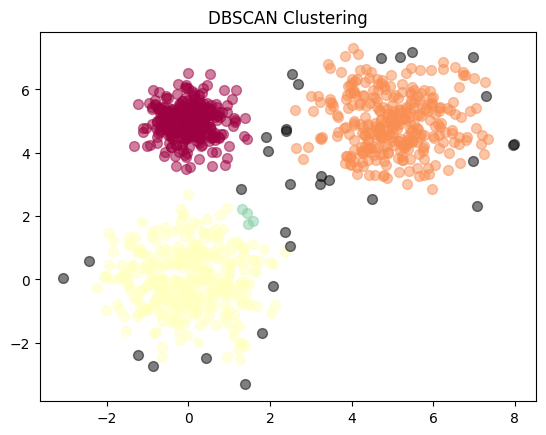

In [19]:
import numpy as np

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.show()

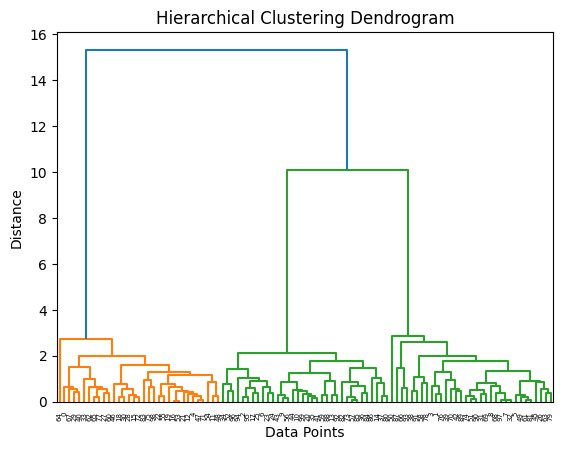

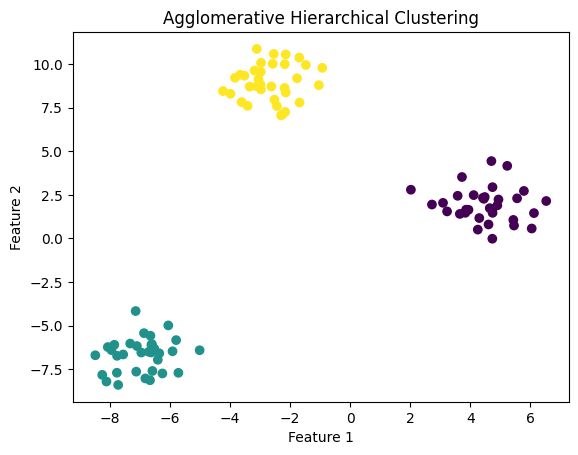

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
data, labels = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Agglomerative clustering
model = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = model.fit_predict(data)

# Dendrogram for hierarchical clustering
linkage_matrix = linkage(data, method='average')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Scatter plot to visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [22]:
k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]]


In [23]:
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []

      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

In [24]:
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []

      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)

        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix])

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']

        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so

        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge


In [25]:
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)

        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)

        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

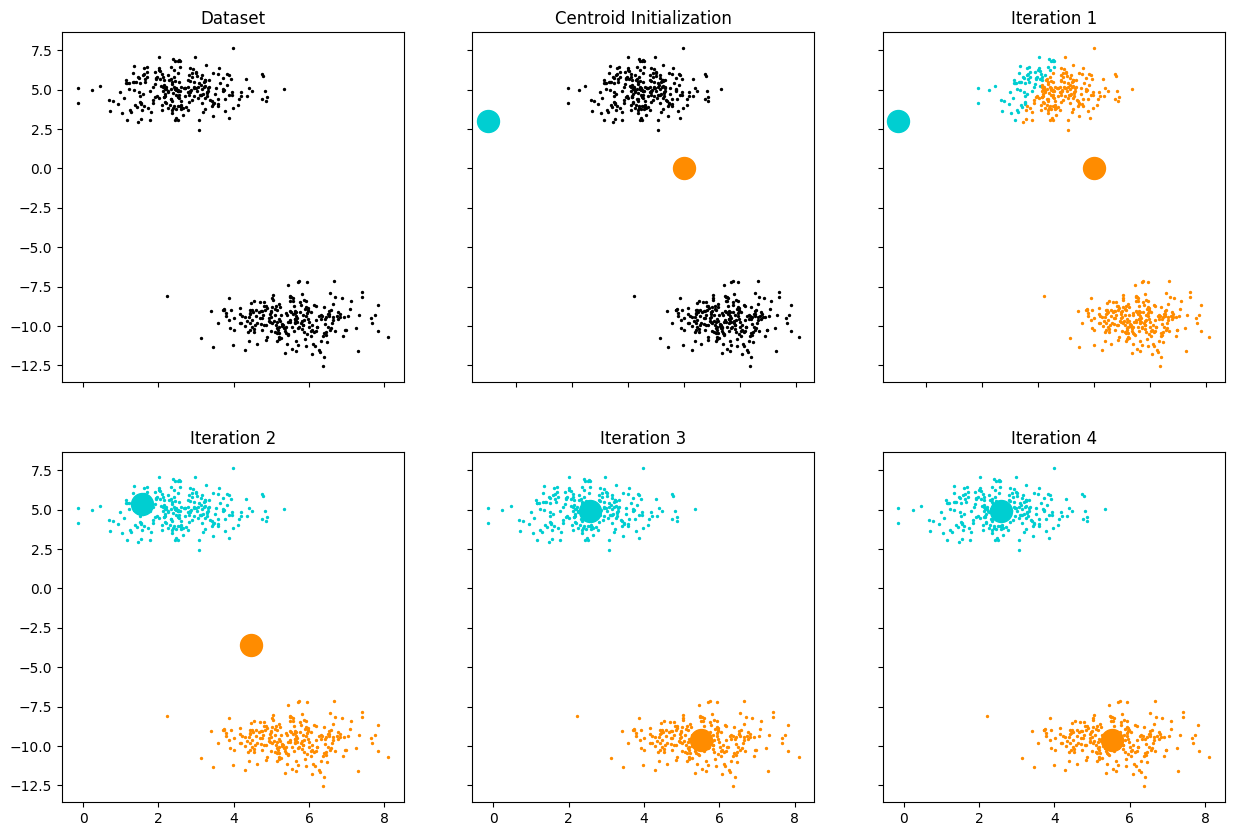

In [26]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [27]:
k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


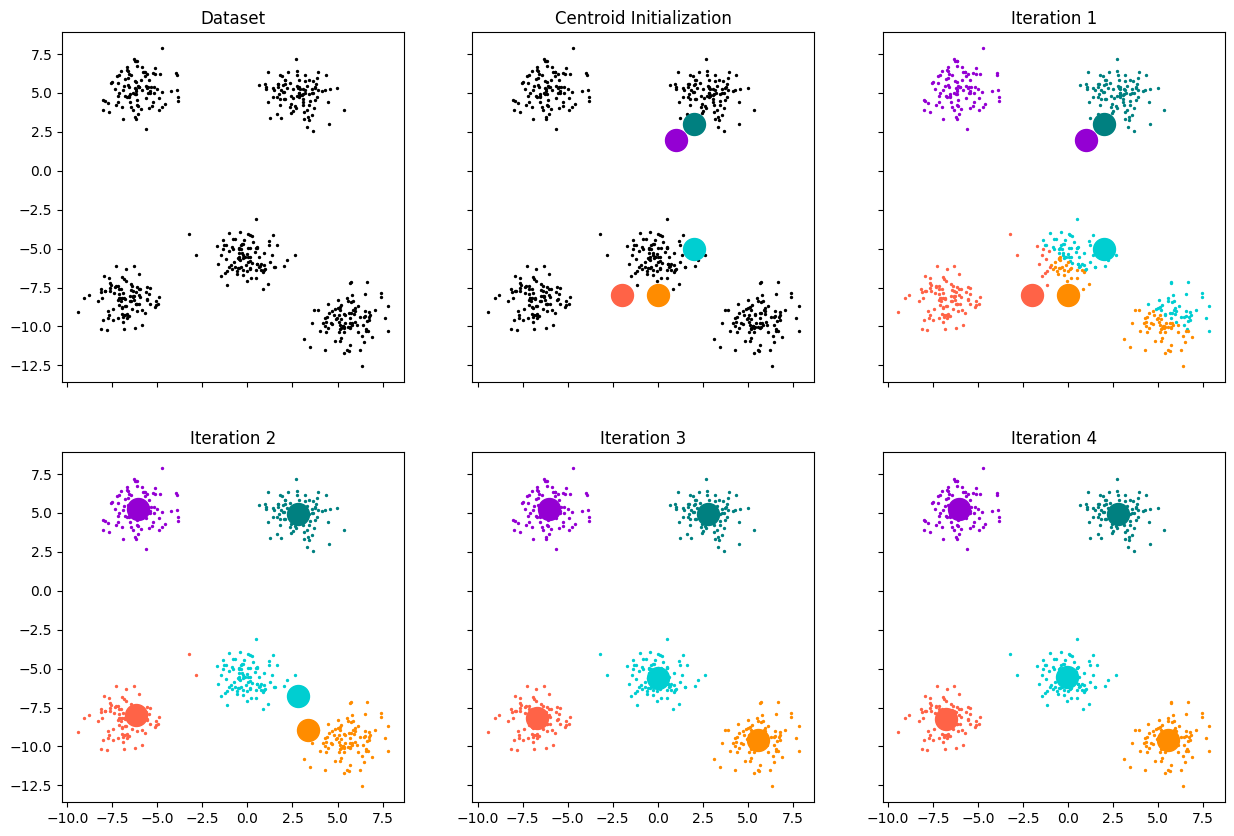

In [28]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

## Change initialization here to 'np.random.seed(0)'
np.random.seed(3)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [29]:
from copy import deepcopy

def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

In [30]:
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore', category=FutureWarning)  # Suppress FutureWarning
kmeans = KMeans(n_clusters=5)

In [32]:
from sklearn.cluster import KMeans

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?


#kmeans_demo = KMeans(n_clusters=10, init='k-means++') #Does smart centroid initialization help?
#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore', category=FutureWarning)  # Suppress FutureWarning
kmeans = KMeans(n_clusters=5)


ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[ 5.56873506 -9.60861515]
 [-6.06533341  5.2400571 ]
 [-6.78567723 -8.26282547]
 [ 2.78561142  4.93182424]
 [-0.06909909 -5.56399319]]



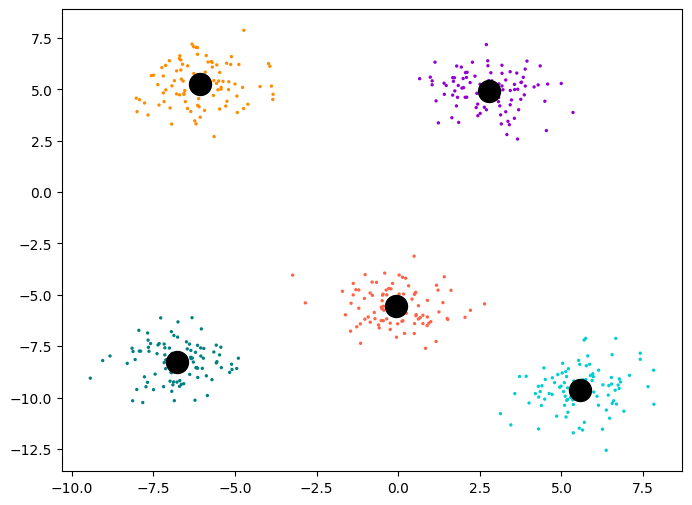

In [33]:
#Lets inspect the clustering model
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(8,6)
plt.show()

In [34]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets

In [35]:
#import the dataset
iris = datasets.load_iris()
# print(iris.data[:10])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore', category=FutureWarning)  # Suppress FutureWarning
kmeans = KMeans(n_clusters=5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


In [37]:
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore', category=FutureWarning)  # Suppress FutureWarning
kmeans = KMeans(n_clusters=5)


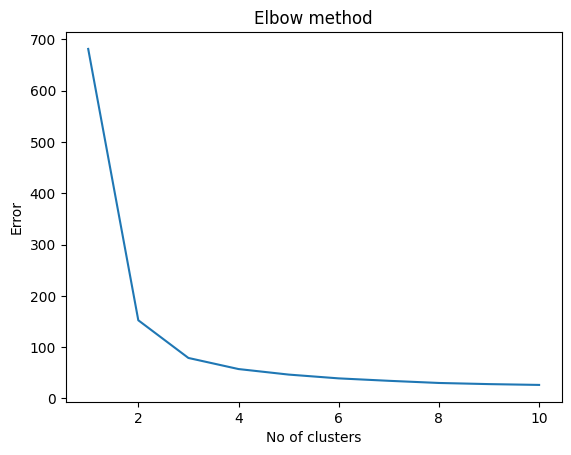

In [38]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [39]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

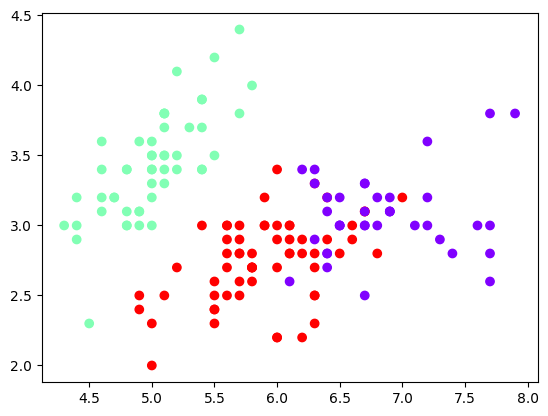

In [40]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')